In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
adv = pd.read_csv('https://raw.githubusercontent.com/galvin-mj/DAT_ATL_15/master/Datasets/Advertising.csv')
del adv['Unnamed: 0']
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Linear Regression

### Simple Linear Regression
#### Introduction

* Simple regression model
* Easy to use
* Easy to understand
* Fast

#### Model Representation
Simple linear regression is an approach for predicting a **continuous response** using a **single feature**. It assumes the true relationship between x and y is linear $Y = \beta_0 + \beta_1X + \epsilon$

- $y$ is the response
- $x$ is the predictor
- $\beta_0$ Intercept
- $\beta_1$ Slope
- $\epsilon$ is a random error with mean 0 and constant variance

$\beta_0$ and $\beta_1$ are called the **model coefficients**

What does this look like?

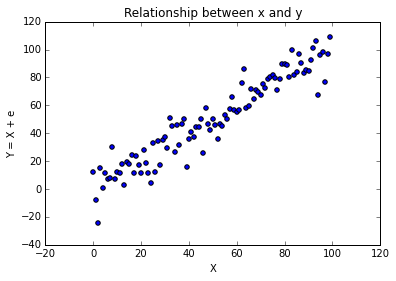

In [8]:
random_normal = np.random.randn(100)
x = np.arange(100)
e = np.random.randn(100)*10
y = x+e

plt.scatter(x,y)
plt.title('Relationship between x and y')
plt.xlabel('X')
plt.ylabel('Y = X + e')

$y = \beta_0 + \beta_1x + \epsilon$
- $\beta_0 = 0$ 
- $\beta_1 = 1$
- $\epsilon = e$

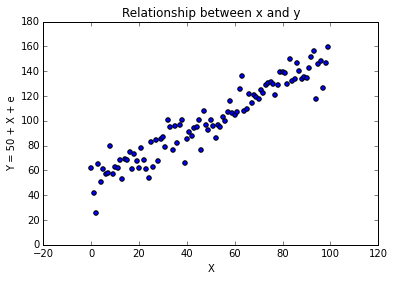

In [9]:
y = 50+x+e

plt.scatter(x,y)
plt.title('Relationship between x and y')
plt.xlabel('X')
plt.ylabel('Y = 50 + X + e')

$y = \beta_0 + \beta_1x + \epsilon$
- $\beta_0 = 50$ 
- $\beta_1 = 1$
- $\epsilon = e$

#### Estimation

How this works
* Assuming the true relationship: $Y = \beta_0 + \beta_1X + \epsilon$
* Estimate $\beta_0$ and $\beta_1$ denote estimates by $\hat{\beta_0}$ and $\hat{\beta_1}$
* Use estimates to make predictions $\hat{y}=\hat{\beta_0} + \hat{\beta_1}x $

How do we estimate $\beta_0$ and $\beta_1$?
* Given a data set $(x_1, y_1),(x_2,y_2),...,(x_n,y_n)$
* For a given estimate define the residual as $e_i=y_i-\hat{y_i}=y_i-\hat{\beta_0} - \hat{\beta_1}x_i$
<img src="RSS2.gif">
* Residual Sum Squares $(RSS) =\sum_i e^{2}_i$

* Objective: Find the $\beta_0$ and $\beta_1$ that minimize Residual Sum Squares $(RSS) =\sum_i e^{2}_i$

#### Estimate with Scikit Learn

coefficient [ 1.00903139]
intercept 49.9240726409


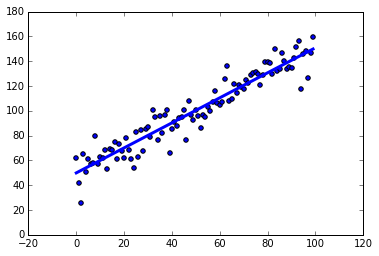

In [10]:
from sklearn import linear_model
rgr = linear_model.LinearRegression()
rgr.fit(x.reshape(100, 1),y)
print("coefficient {}".format(rgr.coef_))
print("intercept {}".format(rgr.intercept_))

plt.scatter(x,y)
plt.plot(x, rgr.predict(x.reshape(100, 1)), color='blue',linewidth=3)

#### Estimate with Statsmodels

('Parameters: ', Intercept    49.924073
X             1.009031
dtype: float64)
('R2: ', 0.90400467209386959)
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     922.9
Date:                Tue, 15 Sep 2015   Prob (F-statistic):           1.14e-51
Time:                        21:01:27   Log-Likelihood:                -366.93
No. Observations:                 100   AIC:                             737.9
Df Residuals:                      98   BIC:                             743.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------

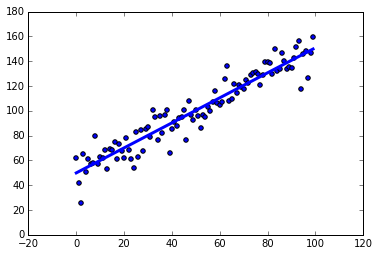

In [11]:
import statsmodels.formula.api as sm

df = pd.DataFrame({'X':x, 'Y':y})
model = sm.ols(formula='Y ~ X', data=df)
results = model.fit()
print('Parameters: ', results.params)
print('R2: ', results.rsquared)
print(results.summary())
plt.scatter(x,y)
plt.plot(x, results.predict(pd.DataFrame(df['X'])), color='blue',linewidth=3)

#### Estimate with Scipy

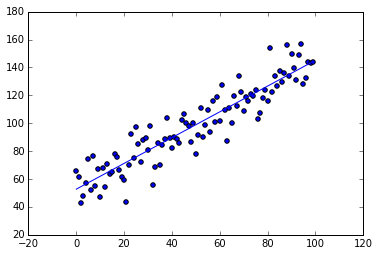

In [77]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.scatter(x, y)
plt.plot(x, intercept + slope * x)

### LAB: Advertising Dataset
* What is the slope and intercept?
* How would you interpret the results?
* Does any one media method appear better than another?

### Multiple Linear Regression

Extension of simple linear regression to several variables. $Y = \beta_0 + \beta_1X_1 + ... + \beta_pX_p + \epsilon$

* Estimate $\beta_0$,..., $\beta_p$ denote estimates by $\hat{\beta_0}$,...,$\hat{\beta_p}$
* Use estimates to make predictions $\hat{y}=\hat{\beta_0} + \hat{\beta_1}x_1 +...+ \hat{\beta_p}x_p $

How do we estimate $\beta_0$,..., $\beta_p$?
* Given a data set $(x_{1,1},..,x_{1,p}, y_1),(x_{2,1},..,x_{2,p},y_2),...,(x_{n,1},..,x_{n,p},y_n)$
* Minimize RSS


In [12]:
import random

x1= np.random.randint(100,size=100)
x2= np.random.randint(100,size=100)
y = 2*x1 + 3*x2 + np.random.randn(100)*10

data = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
data.head()

,x1,x2,y
0,39,79,323.130024
1,28,74,284.997968
2,13,95,321.523172
3,3,34,107.620360
4,51,4,102.384894


In [11]:
rgr = linear_model.LinearRegression()
rgr.fit(data[['x1','x2']],data['y'])
results = rgr.predict(data[['x1','x2']])-data['y']

In [13]:
model = sm.ols(formula='y ~ x1+x2', data=data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     4490.
Date:                Tue, 15 Sep 2015   Prob (F-statistic):           2.51e-96
Time:                        21:01:41   Log-Likelihood:                -367.46
No. Observations:                 100   AIC:                             740.9
Df Residuals:                      97   BIC:                             748.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.8768      2.803      1.383      0.1

### Hypothesis Test and P-Values 

Hypothesis Test:
* Null Hypothesis: Default hypothesis
* Alternative Hypothesis: Alternative to the Null
* Check data to see if there is enough evidence to reject the null in favor of the alternative
* p-value: Used as a threshold to reject the null. Usually 0.05. (probability of seeing the data or more extreme if the null hypothesis is true)

In linear regression:
* Null hypothesis is that there is no relationship between predictor and response

### R-Squared
* Coefficient of determination
* Proportion of variance explained
* Used as a measure of how well the model fits
* Goes from 0 to 1 where the higher the better
* Adding more features always improves r-squared. Adjusted r-squared tries to correct for this

### Lab: Advertising Data
* What are the coefficients?
* What is the r-squared value?
* What are the p-values? 
* What features are most important?
* How would you interpret these results?

### Interactions

Previously we assumed that a coefficient was the expected change in y given a unit change in x with all other predictors held fixed.

What if there is an interaction effect  where an increase in one predictor changes the coefficient of another predictor?

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_1x_2+ \epsilon$
 
$= \beta_0 + \beta_1x_1 + \beta_3x_1x_2+\beta_2x_2 +  \epsilon$

$= \beta_0 + (\beta_1 + \beta_3x_2)x_1+\beta_2x_2 +  \epsilon$

In [27]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


#### Let's go through a quick example

In [16]:
model = sm.ols(formula='y ~ x1+x2+x1*x2', data=data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2964.
Date:                Wed, 16 Sep 2015   Prob (F-statistic):           1.86e-94
Time:                        16:39:23   Log-Likelihood:                -367.44
No. Observations:                 100   AIC:                             742.9
Df Residuals:                      96   BIC:                             753.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.4950      4.067      1.105      0.2

### Lab: Interactions On Advertising Data
Run a linear regression on the advertising data using radio, tv, and the interaction between radio and tv
* What are the coefficients?
* What is the r-squared value?
* What are the p-values? 
* What features are most important?
* How would you interpret these results?

### Dummie Variables
Dummie variables are a way to numerically encode categorical variables so they can be used in specific models. The pandas method get_dummies() will perform this task. In general, for n categores you only need n-1 dummie variables.

In [26]:
categories = ['apple', 'orange', 'banana', 'banana', 'orange', 'orange']
pd.get_dummies(categories)

,apple,banana,orange
0,1,0,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
5,0,0,1


In [24]:
credit = pd.read_csv('/Users/mike/Documents/General Assembly/DAT_ATL_15/Datasets/credit.csv')
del credit['Unnamed: 0']
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [29]:
tmp_credit = pd.merge(credit, pd.get_dummies(credit['Student']), how='inner', left_index=True, right_index=True)

In [31]:
model = sm.ols(formula='Income ~ No', data=tmp_credit)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1535
Date:                Wed, 16 Sep 2015   Prob (F-statistic):              0.695
Time:                        17:26:29   Log-Likelihood:                -1991.9
No. Observations:                 400   AIC:                             3988.
Df Residuals:                     398   BIC:                             3996.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     47.2920      5.579      8.478      0.0

### Interactions with dummies

In [46]:
tmp_credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,No,Yes
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,1,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,1,0


In [47]:
model = sm.ols(formula='Balance ~ Income  + No + No*Income', data=tmp_credit)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.30
Date:                Wed, 16 Sep 2015   Prob (F-statistic):           4.94e-28
Time:                        17:34:34   Log-Likelihood:                -2953.7
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     396   BIC:                             5931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    677.2990     98.760      6.858      0.0

### Nonlinear 

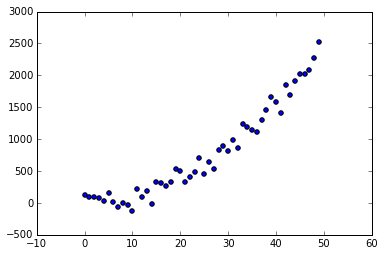

In [51]:
random_normal = np.random.randn(50)
x = np.arange(50)
y = x**2+np.random.randn(50)*100
plt.scatter(x,y)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     436.0
Date:                Wed, 16 Sep 2015   Prob (F-statistic):           9.86e-26
Time:                        17:38:57   Log-Likelihood:                -342.43
No. Observations:                  50   AIC:                             688.9
Df Residuals:                      48   BIC:                             692.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -376.7117     64.862     -5.808      0.0

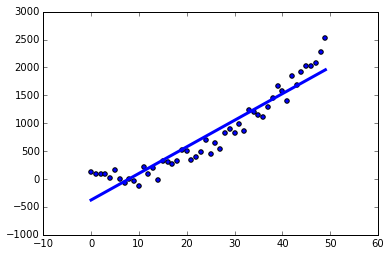

In [56]:
df = pd.DataFrame({'X':x, 'Y':y})
model = sm.ols(formula='Y ~ X', data=df)
results = model.fit()
print(results.summary())
plt.scatter(x,y)
plt.plot(x, results.fittedvalues, color='blue',linewidth=3)

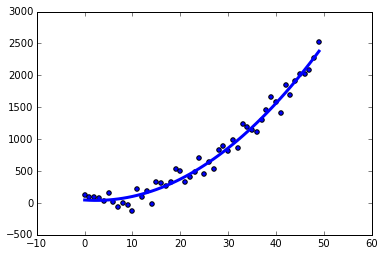

In [70]:
a,b,c = np.polyfit(x, y, 2)
plt.scatter(x,y)
plt.plot(x, c+b*x+a*x*x, color='blue',linewidth=3)

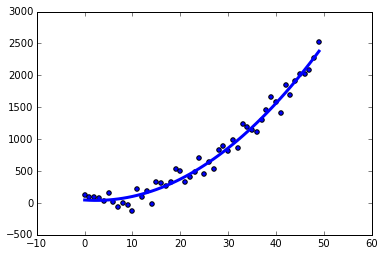

In [72]:
p = np.polyfit(x, y, 2)
plt.scatter(x,y)
plt.plot(x, np.polyval(p,x), color='blue',linewidth=3)

/Users/mike/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


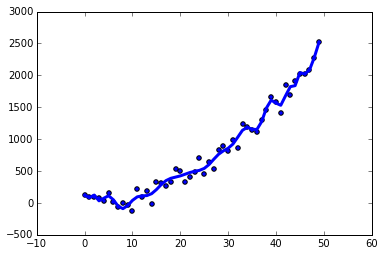

In [76]:
p = np.polyfit(x, y, 50)
plt.scatter(x,y)
plt.plot(x, np.polyval(p,x), color='blue',linewidth=3)

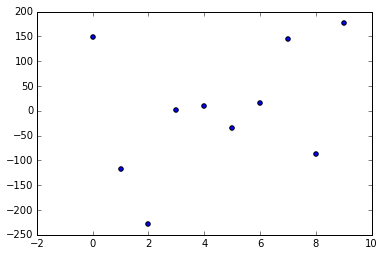

In [87]:
random_normal = np.random.randn(50)
x = np.arange(10)
y = x**2+np.random.randn(10)*100
plt.scatter(x,y)


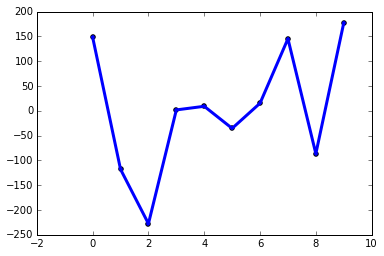

In [88]:
plt.scatter(x,y)
p = np.polyfit(x, y, 9)
plt.plot(x, np.polyval(p,x), color='blue',linewidth=3)